----------------------Initial dataset-------------------------
       Age  Gender  PC+TV on weekdays  PC+TV on weekends  ScreenTime  \
0     14.0    Male                2.0               10.0    4.285714   
1     69.0  Female                3.0                9.0    4.714286   
2     39.0  Female                3.0                9.0    4.714286   
3     46.0    Male                2.0                7.0    3.428571   
4     67.0  Female                3.0                2.0    2.714286   
...    ...     ...                ...                ...         ...   
9995   7.0  Female                2.0                3.0    2.285714   
9996  28.0    Male                3.0                4.0    3.285714   
9997  31.0  Female                4.0                9.0    5.428571   
9998  61.0  Female                2.0                8.0    3.714286   
9999  36.0  Female                3.0                5.0    3.571429   

     Screen_time_exposure  Exercise  
0                    High       2.

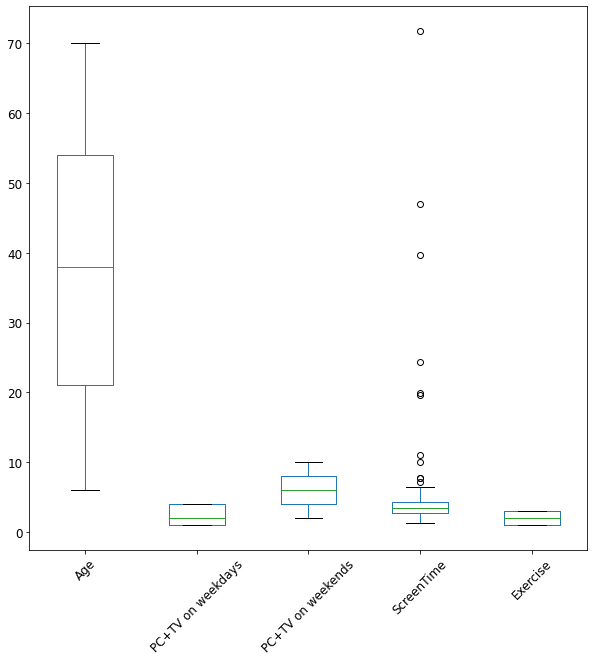

One of the attributes has a functional relationship with another attribute. One of the attributes has a functional relationship with two other attributes.They do not have any anomalous data
----------------------------------Second Dataset------------------------------------------------------------
       Age  Gender  PC+TV on weekdays  PC+TV on weekends  ScreenTime  \
0     14.0    Male                2.0               10.0    4.285714   
1     69.0  Female                3.0                9.0    4.714286   
2     39.0  Female                3.0                9.0    4.714286   
3     46.0    Male                2.0                7.0    3.428571   
4     67.0  Female                3.0                2.0    2.714286   
...    ...     ...                ...                ...         ...   
9995   7.0  Female                2.0                3.0    2.285714   
9996  28.0    Male                3.0                4.0    3.285714   
9997  31.0  Female                4.0                

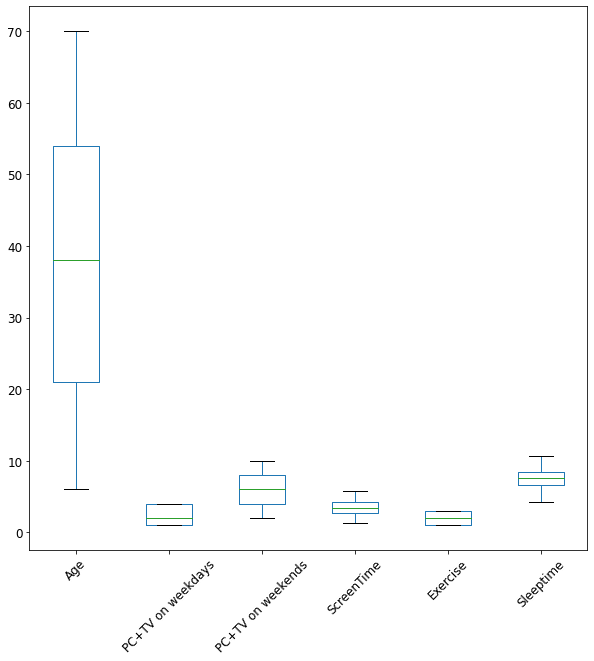

 One of the attributes has a functional relationship with another attribute. One of the attributes has a functional relationship with two other attributes and alsohas 1% to 20% random anomalous data.
------------------------------------Third Dataset-----------------------------------------------
       Age  Gender  PC+TV on weekdays  PC+TV on weekends  ScreenTime  \
0     14.0    Male                2.0               10.0    7.201916   
1     69.0  Female                3.0                9.0    6.508074   
2     39.0  Female                3.0                9.0   11.006796   
3     46.0    Male                2.0                7.0    6.048322   
4     67.0  Female                3.0                2.0   39.632172   
...    ...     ...                ...                ...         ...   
9995   7.0  Female                2.0                3.0    2.285714   
9996  28.0    Male                3.0                4.0    3.285714   
9997  31.0  Female                4.0                9.

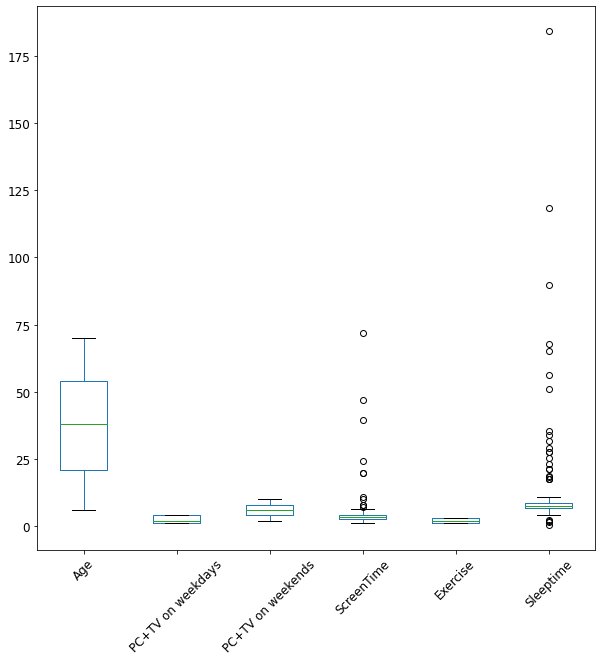

In [7]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
Gender = ['Male','Female']
df= pd.DataFrame()
for i in range(0,10000):
    df.loc[i, 'Age']=random.randint(6,70)
    df.loc[i, 'Gender']=random.choice(Gender)
    weekdays=random.randint(1,4)
    df.loc[i,'PC+TV on weekdays']=weekdays
    weekend=random.randint(2,10)
    df.loc[i,'PC+TV on weekends']=weekend
    tst=(5/7)*(weekdays)+(2/7)*(weekend)
    df.loc[i,'ScreenTime']=tst 
    if tst>2.5:
        df.loc[i, 'Screen_time_exposure']='High'
    else:
        df.loc[i, 'Screen_time_exposure']='Low'
    exercise=random.randint(1,3)
    df.loc[i,'Exercise']=exercise      
df1=df.copy()
print("----------------------Initial dataset-------------------------")
print(df1)
npy_array = df['ScreenTime'].to_numpy()
anomaly_indices = np.random.choice(range(15), size=500, replace=True)
npy_array[anomaly_indices] = np.random.exponential(scale=20, size=500)
tempdf= pd.DataFrame(npy_array,columns =['ScreenTime'])
df['ScreenTime']=tempdf['ScreenTime']
print("One of the attributes has a functional relationship with another attribute. This particular attribute also has 1% to 20% random anomalous data.")
print("------------------------------------First Dataset-----------------------------------------------")
print(df)
df.to_csv('First_Dataset.csv')
plt.subplots(figsize=(10,10))
boxplot = df.boxplot(column=['Age','PC+TV on weekdays', 'PC+TV on weekends', 'ScreenTime','Exercise'], grid=False, rot=45, fontsize=12)  
plt.show()
for i in range (0, 10000):
    slpt=9-df1.ScreenTime[i]+df1.Exercise[i]
    df1.loc[i,'Sleeptime']=slpt
    df.loc[i,'Sleeptime']=slpt
    if slpt>= 9.5:
        slpp="High"
        df1.loc[i, "Sleeping_pattern"]= slpp
    elif slpt>=6 and slpt<9.5:
        slpp="Normal"
        df1.loc[i, "Sleeping_pattern"]= slpp
    else:
        slpp="Low" 
        df1.loc[i, "Sleeping_pattern"]= slpp
    df.loc[i,"Sleeping_pattern"]=slpp

print("One of the attributes has a functional relationship with another attribute. One of the attributes has a functional relationship with two other attributes.They do not have any anomalous data")
print("----------------------------------Second Dataset------------------------------------------------------------")
print(df1)
df1.to_csv('Second_Dataset.csv')
plt.subplots(figsize=(10,10))
boxplot = df1.boxplot(column=['Age','PC+TV on weekdays', 'PC+TV on weekends', 'ScreenTime','Exercise','Sleeptime'], grid=False, rot=45, fontsize=12)  
plt.show()
slp_array = df['Sleeptime'].to_numpy()
anomaly_indices = np.random.choice(range(30), size=1000, replace=True)
slp_array[anomaly_indices] = np.random.exponential(scale=30, size=1000)
temp1df= pd.DataFrame(slp_array,columns =['Sleeptime'])
df['Sleeptime']=temp1df['Sleeptime']
print(" One of the attributes has a functional relationship with another attribute. One of the attributes has a functional relationship with two other attributes and alsohas 1% to 20% random anomalous data.")
print("------------------------------------Third Dataset-----------------------------------------------")
print(df)
df.to_csv('Third_Dataset.csv')
plt.subplots(figsize=(10,10))
boxplot = df.boxplot(column=['Age','PC+TV on weekdays', 'PC+TV on weekends', 'ScreenTime','Exercise','Sleeptime'], grid=False, rot=45, fontsize=12)  
plt.show()
